In [3]:
#Chapter 1 - Preliminaries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import statsmodels as sm 

b'espanol'

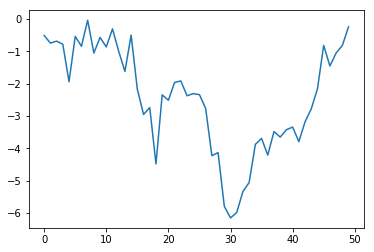

In [7]:
#Chapter 2 - Python Language Basics, Ipython, and Jupyter Notebooks
'''
%run -- execute the code in the specified file 
? -- before or after a variable will display some general information about the object 
?? -- also show the functions source code 
* -- show all names matching the wildcard expression 
%run -i -- give a access to variable already defined in the interactive IPython namespace.
%load -- import a script into a code cell 
%paste -- execute clipboard single block 
%pdb -- Automatically enter debugger after any exception 

"duck typing" -- not care about the type of an object but rather only whether it has certain methods or behavior
'''
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.plot(np.random.randn(50).cumsum())

val = "espanol"
val.encode('latin1')